# <font color=black> Analysis - FC-based parcellation </font>
<hr style="border:1px solid black">

## <font color=black> <span style="background-color: #A0B0C0"> Imports 

In [2]:
import sys,json
import glob, os
import numpy as np
sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from fc_based_parcellation import FC_Parcellation

%matplotlib inline
%load_ext autoreload
%autoreload 2

## <font color=black> <span style="background-color: #A0B0C0"> Initialization

### <font color=#A0B0C0> I Configuration & parameters </font>

In [3]:
with open('../config/config_fc_based_parcellation_NK.json') as config_file:
    config = json.load(config_file) # load config file

### <font color=#A0B0C0> II Class instance </font>

In [4]:
fc_parcellation = FC_Parcellation(config,'spinalcord','brain')

In [5]:
fc_parcellation.compute_voxelwise_correlation(load_from_file=False, mask_source_path=config['main_dir']+config['masks']['spinalcord'],mask_target_path=config['main_dir']+config['masks']['brain'])

COMPUTE VOXELWISE CORRELATION
... Computing correlations for all possibilities
...... Subject P028
... Computing mean correlation over subjects
DONE!


DEFINE NUMBER OF CLUSTERS
...Loading clustering parameters, method agglom
...Computing SSE and silhouette coefficients
......K = 5
......K = 6
......K = 7
......K = 8
......K = 9
......K = 10
......K = 11
......K = 12
......K = 13
......K = 14
......K = 15
......K = 16
......K = 17
......K = 18
......K = 19


/home/kinany/anaconda3/lib/python3.9/site-packages/kneed/knee_locator.py:225: RuntimeWarning: invalid value encountered in true_divide
  return (a - min(a)) / (max(a) - min(a))
/home/kinany/anaconda3/lib/python3.9/site-packages/kneed/knee_locator.py:244: RuntimeWarning: No local maxima found in the difference curve
The line is probably not polynomial, try plotting
the difference curve with plt.plot(knee.x_difference, knee.y_difference)
Also check that you aren't mistakenly setting the curve argument
  warnings.warn(


Knee of SSE curve is at K = None
DONE


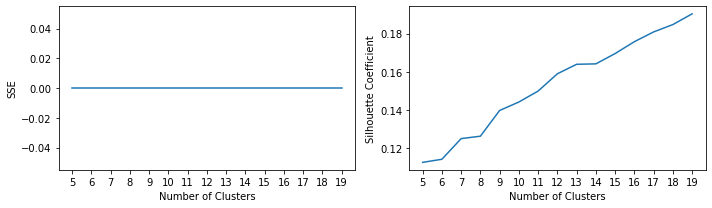

In [7]:
fc_parcellation.define_n_clusters(range(5,20),algorithm='agglom')

In [10]:
fc_parcellation.run_clustering(13,algorithm='agglom')

RUN AGGLOMERATIVE CLUSTERING FOR K = 13
DONE


In [11]:
fc_parcellation.prepare_seed_map()

PREPARE SEED MAP
DONE


In [12]:
fc_parcellation.prepare_target_maps()

PREPARE BRAIN MAPS
...Compute mean connectivity profiles
...Save as nifti files
DONE


In [13]:
fc_parcellation.run_clustering(13,algorithm='kmeans')

RUN K-MEANS CLUSTERING FOR K = 13
DONE


In [14]:
fc_parcellation.prepare_seed_map()

PREPARE SEED MAP
DONE


In [15]:
fc_parcellation.prepare_target_maps()

PREPARE BRAIN MAPS
...Compute mean connectivity profiles
...Save as nifti files
DONE


In [18]:
A = np.array([0,2,43,4,2,3,4,2,3])

In [22]:
std = A.std(axis=0)
A = A/ std

In [23]:
A.std(axis=0)

0.9999999999999999